IMPORTING LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

IMPORTING DATASET

In [2]:
df = pd.read_excel('songs-rated.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867 entries, 0 to 866
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  867 non-null    object
 1   album   867 non-null    object
 2   track   867 non-null    object
 3   rating  867 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 27.2+ KB


In [4]:
#drops rows that have the same track and artist 
def drop_duplicate_tracks(df):
    df_non_duplicates = pd.DataFrame(columns=df.columns)
    for index, row in df.iterrows():
        if not ((df_non_duplicates['track'] == row['track']) & (df_non_duplicates['artist'] == row['artist'])).any():
            df_non_duplicates = pd.concat([df_non_duplicates, row.to_frame().transpose()], ignore_index=True)

    return df_non_duplicates

df = drop_duplicate_tracks(df)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 867 entries, 0 to 866
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  867 non-null    object
 1   album   867 non-null    object
 2   track   867 non-null    object
 3   rating  867 non-null    object
dtypes: object(4)
memory usage: 27.2+ KB


In [6]:
unique_artists = df['artist'].unique()

# Display the unique artist names
print(unique_artists)

['XXXTENTACION' 'Ed Sheeran' 'Nilüfer' 'David Guetta' 'Jason Derulo'
 'Kanye West' 'Coldplay' 'Travis Scott' 'The Weeknd' 'Post Malone' 'Queen'
 'Duman' 'Bruno Mars' 'mor ve ötesi' 'Teoman' 'Imagine Dragons'
 'Shawn Mendes' 'USHER' 'Sam Smith' 'maNga' 'Müslüm Gürses' 'Eminem'
 'Maroon 5' 'MIKA']


GENRE MAPPING

In [7]:
artist_genre_mapping = {
    "XXXTENTACION" : "Rap",
    "Ed Sheeran" : "Pop" ,
    "Nilüfer" : "Turkish Rock", 
    "David Guetta": "EDM",
    "Jason Derulo": "R&B",
    "Kanye West": "Hip-hop",
    "Coldplay": "Alternative Rock",
    "Travis Scott": "Hip-hop",
    "The Weeknd": "R&B",
    "Post Malone": "Rap",
    "Queen": "Rock",
    "Duman": "Turkish Rock",
    "Bruno Mars": "Pop",
    "mor ve ötesi": "Turkish Rock",
    "Teoman" : "Turkish Rock",
    "Imagine Dragons" : "Alternative Rock",
    "Shawn Mendes": "Pop",
    "USHER" : "R&B",
    "Sam Smith": "Pop",
    "maNga": "Turkish Rock",
    "Müslüm Gürses": "Arabesk",
    "Eminem": "Rap",
    "MIKA" : "Pop",
    "Maroon 5": "Pop"
}

In [8]:
df['genre'] = df['artist'].map(artist_genre_mapping)

GRAPHS

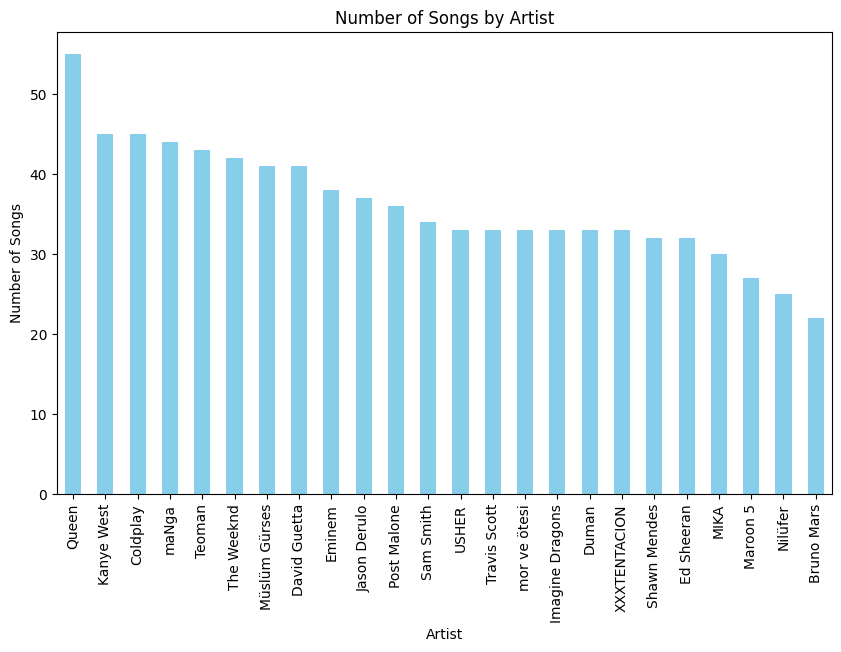

In [9]:
artist_track_count = df.groupby('artist')['track'].count()
plt.figure(figsize=(10, 6))
artist_track_count.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Number of Songs by Artist')
plt.xlabel('Artist')
plt.ylabel('Number of Songs')
plt.show()

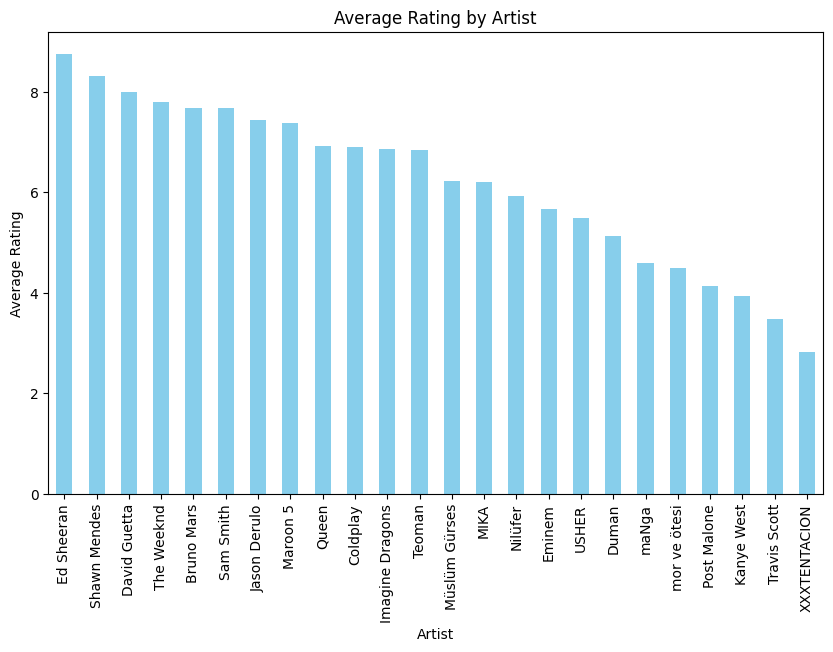

In [10]:
artist_avg_rating = df.groupby('artist')['rating'].mean()
plt.figure(figsize=(10, 6))
artist_avg_rating.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Average Rating by Artist')
plt.xlabel('Artist')
plt.ylabel('Average Rating')
plt.show()

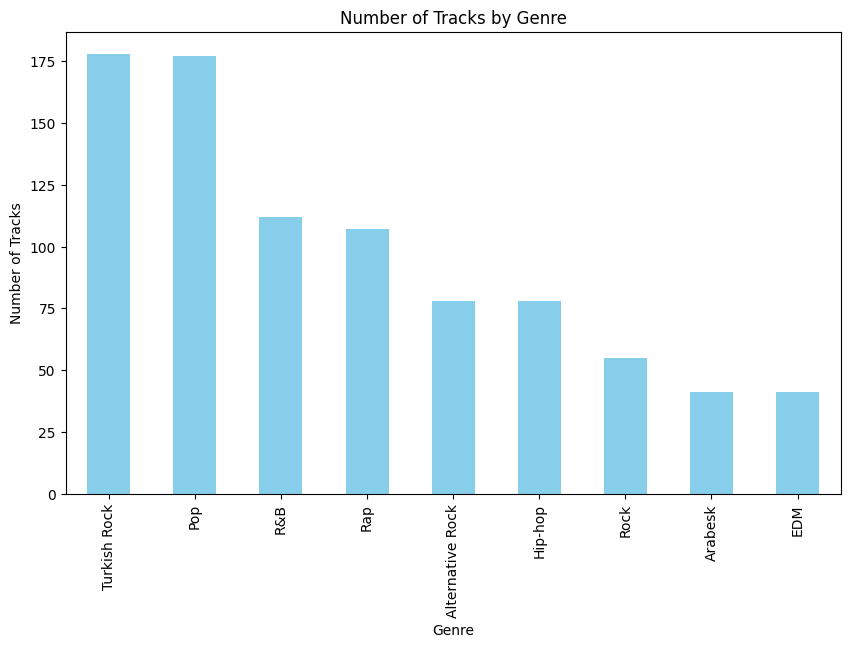

In [11]:
genre_track_count = df.groupby('genre')['track'].count()
plt.figure(figsize=(10, 6))
genre_track_count.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Number of Tracks by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Tracks')
plt.show()

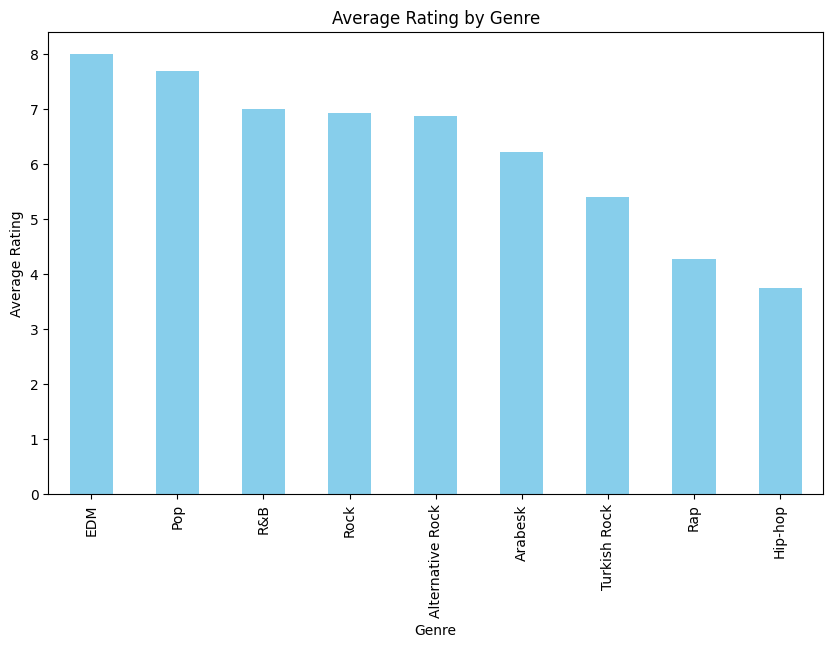

In [12]:
genre_avg_rating = df.groupby('genre')['rating'].mean()
plt.figure(figsize=(10, 6))
genre_avg_rating.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Average Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.show()

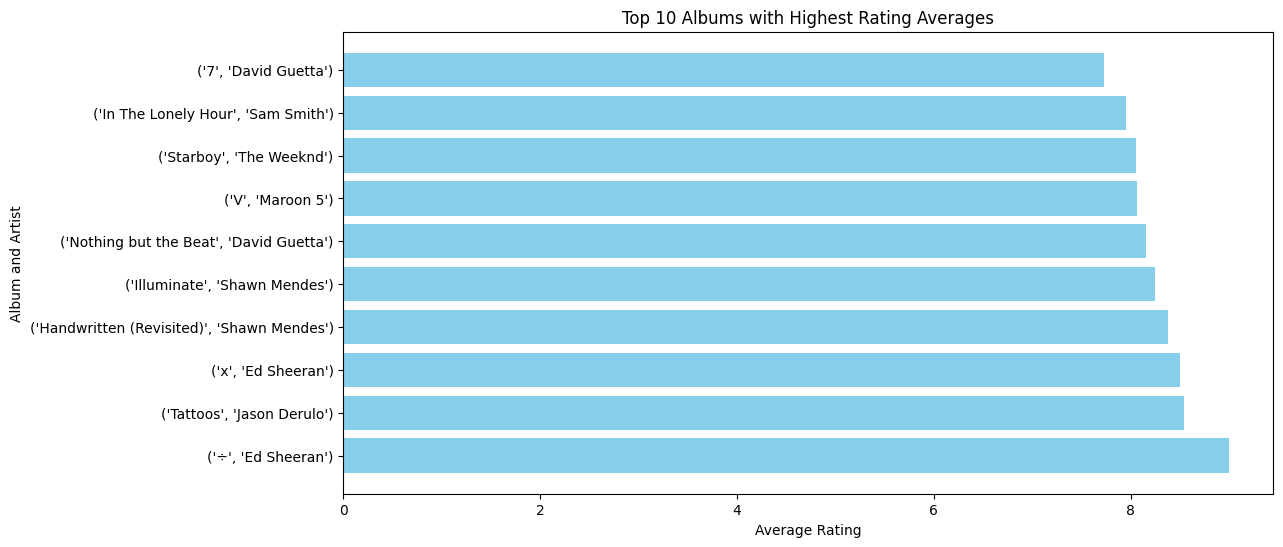

In [13]:
album_artist_avg_ratings = df.groupby(['album', 'artist'])['rating'].mean()
top_10_albums = album_artist_avg_ratings.sort_values(ascending=False).head(10)
albums = top_10_albums.index.get_level_values('album')
artists = top_10_albums.index.get_level_values('artist')
ratings = top_10_albums.values
plt.figure(figsize=(12, 6))
plt.barh(range(10), ratings, color='skyblue')
plt.yticks(range(10), zip(albums, artists))
plt.title('Top 10 Albums with Highest Rating Averages')
plt.xlabel('Average Rating')
plt.ylabel('Album and Artist')
plt.show()

In [14]:
genre_artist_avg_rating = df.groupby(['genre', 'artist'])['rating'].mean()
top_artist_in_genre = genre_artist_avg_rating.groupby('genre').idxmax().apply(lambda x: x[1])
print(top_artist_in_genre)

genre
Alternative Rock         Coldplay
Arabesk             Müslüm Gürses
EDM                  David Guetta
Hip-hop                Kanye West
Pop                    Ed Sheeran
R&B                    The Weeknd
Rap                        Eminem
Rock                        Queen
Turkish Rock               Teoman
Name: rating, dtype: object


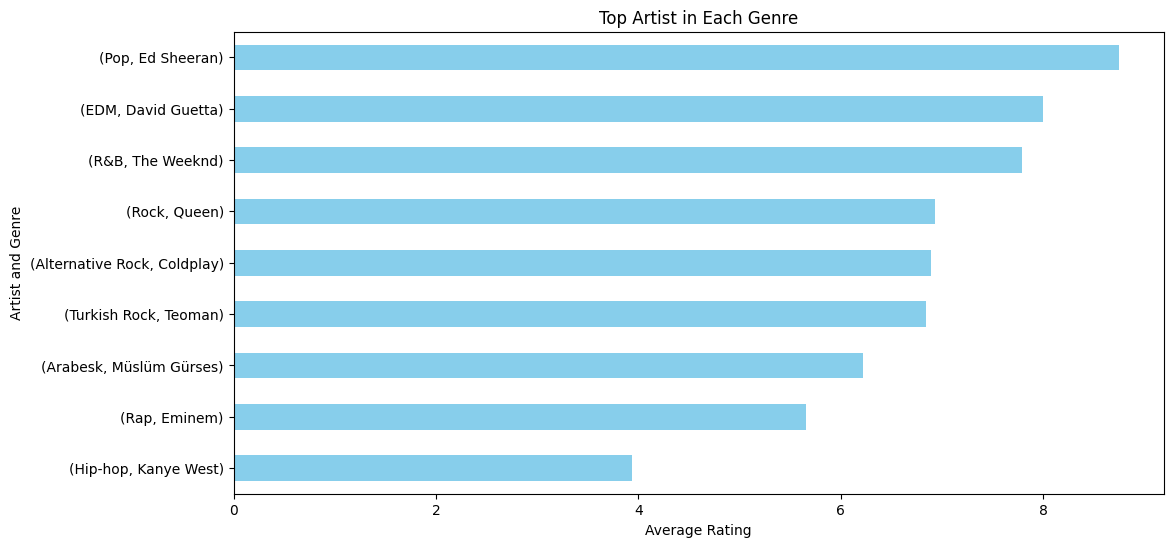

In [15]:
genre_artist_avg_rating = df.groupby(['genre', 'artist'])['rating'].mean()
top_artist_in_genre = genre_artist_avg_rating.groupby('genre').idxmax()
top_artist_ratings = genre_artist_avg_rating.loc[top_artist_in_genre]
plt.figure(figsize=(12, 6))
top_artist_ratings.sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.title('Top Artist in Each Genre')
plt.xlabel('Average Rating')
plt.ylabel('Artist and Genre')
plt.show()

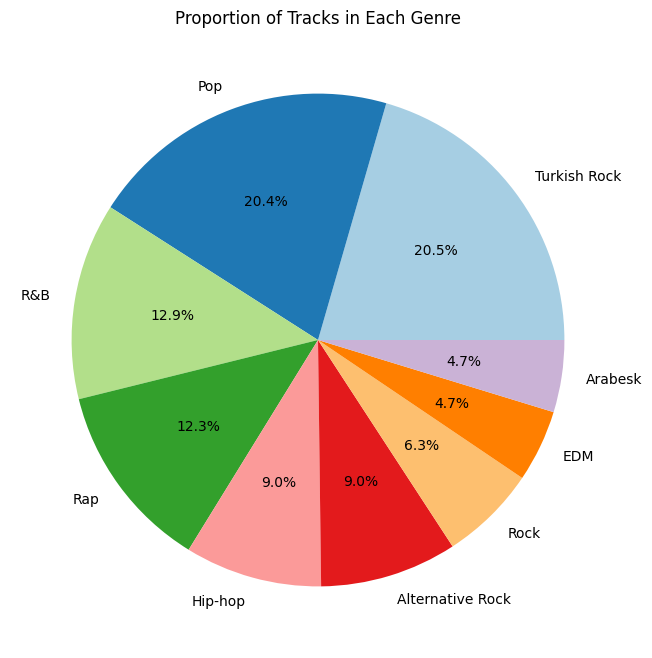

In [16]:
genre_counts = df['genre'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(genre_counts))))
plt.title('Proportion of Tracks in Each Genre')
plt.show()

<Figure size 1200x600 with 0 Axes>

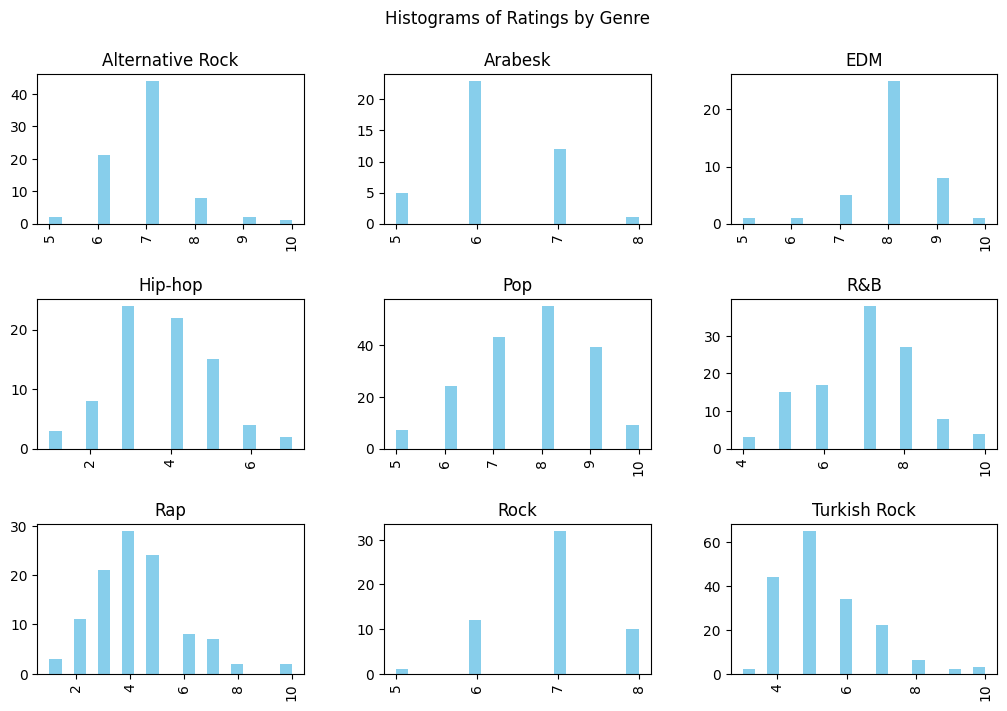

In [17]:
plt.figure(figsize=(12, 6))
df['rating'].hist(by=df['genre'], bins=20, figsize=(12, 8), color='skyblue')
plt.suptitle('Histograms of Ratings by Genre')
plt.show()

/var/folders/g2/2hrn7cf96fj2vfjntl14y94r0000gn/T/ipykernel_38207/1010340011.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='rating', y='genre', data=df, palette='pastel')


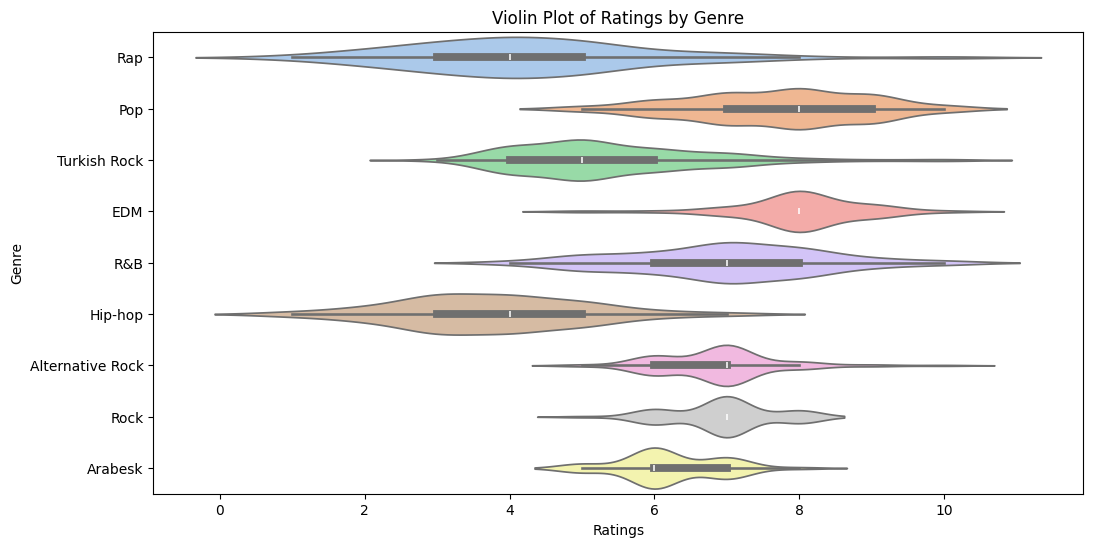

In [18]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='rating', y='genre', data=df, palette='pastel')
plt.title('Violin Plot of Ratings by Genre')
plt.xlabel('Ratings')
plt.ylabel('Genre')
plt.show()

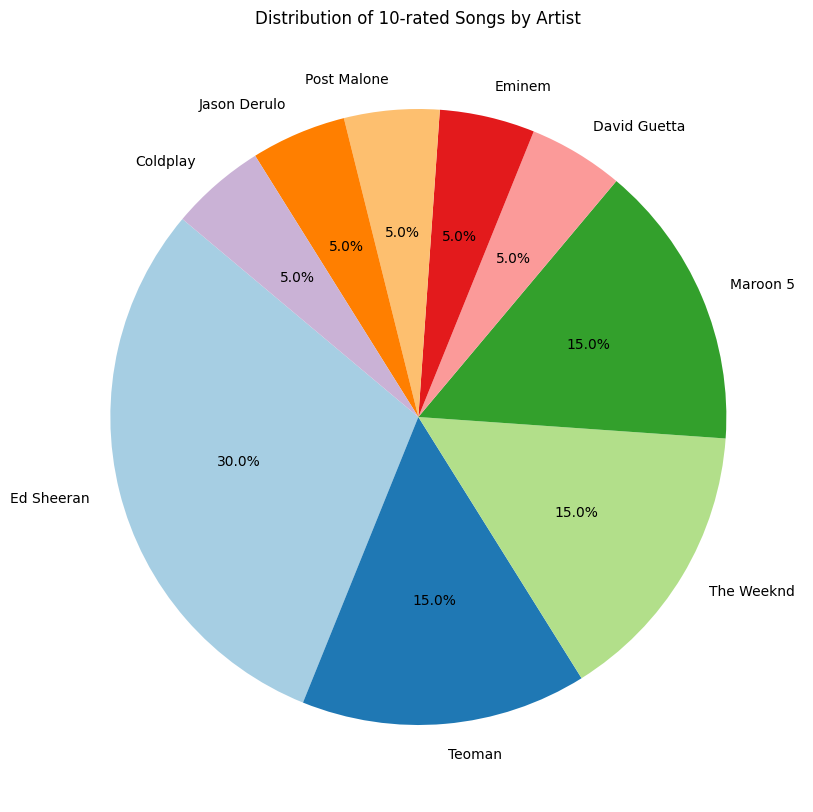

In [19]:
songs_with_rating_10 = df[df['rating'] == 10]
artist_rating_10_counts = songs_with_rating_10['artist'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(artist_rating_10_counts, labels=artist_rating_10_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(artist_rating_10_counts))))
plt.title('Distribution of 10-rated Songs by Artist')
plt.show()

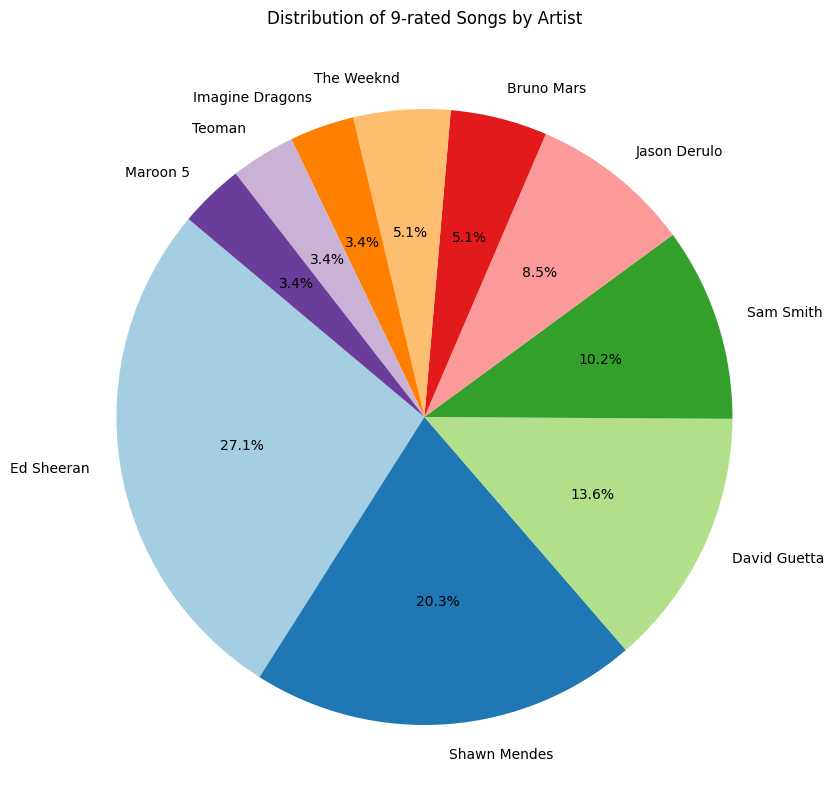

In [20]:
songs_with_rating_9 = df[df['rating'] == 9]
artist_rating_9_counts = songs_with_rating_9['artist'].value_counts()
plt.figure(figsize=(10, 10))
plt.pie(artist_rating_9_counts, labels=artist_rating_9_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(artist_rating_9_counts))))
plt.title('Distribution of 9-rated Songs by Artist')
plt.show()

In [21]:
df.to_excel("ML-data.xlsx", index= False)